<a href="https://colab.research.google.com/github/YeshwanthSadum/YeshwanthSadum-Data-Visualization-Projects/blob/main/pdv_project_Amazon-HeadphoneRecom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install fake_useragent

In [ ]:
import requests
from bs4 import BeautifulSoup
from fake_useragent import UserAgent

ua = UserAgent()
header = {'user-agent':ua.chrome}
google_page = requests.get('https://www.amazon.in/s?k=headphones&crid=1KNIU0KIZ8UF4&sprefix=headphones%2Caps%2C253&ref=nb_sb_noss_1',headers=header)
print(google_page.content)

soup = BeautifulSoup(google_page.content,'lxml') # html.parser

#print(soup.prettify())

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.s

In [ ]:

print(soup.prettify())

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def soup_df(soup):
  df = pd.DataFrame(np.zeros(1000))
  df['Product name'] = soup.find('a',class_="a-link-normal s-link-style a-text-normal").text
  df['mrp'] = soup.find('span',class_="a-price a-text-price").span.text
  df['rating'] = (soup.find('div',class_="a-row a-size-small").text).split()[0]
  df['reviews'] = (soup.find('div',class_="a-row a-size-small").text).split()[5]
  df['offer price'] = soup.find('span',class_="a-price-whole").text
  i = 0
  for data in soup.find_all('a',class_="a-link-normal s-link-style a-text-normal"):
    df['Product name'].iloc[i] = data.text
    i=i+1
    
  i = 0
  for mrp in soup.find_all('span',class_="a-price a-text-price"):
    df['mrp'].iloc[i] = float(mrp.span.text[1:].replace(',',''))
    i=i+1
    
  i = 0
  for rating in soup.find_all('div',class_="a-row a-size-small"):
    df['rating'].iloc[i] = float((rating.text).split()[0])
    i=i+1
    
  i = 0
  for reviews in soup.find_all('div',class_="a-row a-size-small"):
    df['reviews'].iloc[i] = (reviews.text).split()[5].replace(',','')
    i=i+1
    
  i = 0
  for offer in soup.find_all('span',class_="a-price-whole"):
    df['offer price'].iloc[i] = float(offer.text.replace(',',''))
    i=i+1
  
  df = df.drop(0, axis = 1)
  df = df.drop_duplicates(['Product name'])
  return df

In [ ]:
df1 = soup_df(soup)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df1.head()

Product name   mrp  ... reviews offer price
0  Hungama HiLife Buzz 101 On Ear Headphones – 9 ...  4999  ...       2        2299
1  Infinity (JBL) Glide 510, 72 Hrs Playtime with...  3999  ...   36225        1699
2  boAt Rockerz 450 Bluetooth Wireless On Ear Hea...  3990  ...   68409         999
3  boAt Bassheads 900 Wired On Ear Headphones wit...  2490  ...   71782         579
4  boAt Rockerz 550 Bluetooth Wireless Over Ear H...  4999  ...   35754        1899

[5 rows x 5 columns]

In [ ]:
def next_page_soup(soup):
  next_page = soup.find('a', class_="s-pagination-item s-pagination-next s-pagination-button s-pagination-separator")['href']
  ua = UserAgent()
  header = {'user-agent':ua.chrome}
  google_page = requests.get(str('https://www.amazon.in'+next_page),headers=header)
  print(google_page.content)

  soup1 = BeautifulSoup(google_page.content,'lxml') # html.parser
  return soup1

In [ ]:
soup1 = next_page_soup(soup)

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.s

In [ ]:
soup2 = next_page_soup(soup1)

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.s

In [ ]:
soup3 = next_page_soup(soup2)

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.s

In [ ]:
soup4 = next_page_soup(soup3)

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.s

In [ ]:
soup5 = next_page_soup(soup4)

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.s

In [ ]:
df1 = soup_df(soup1)
df2 = soup_df(soup2)
df3 = soup_df(soup3)
df5 = soup_df(soup4)
df6 = soup_df(soup5)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df4 =pd.concat([df,df1,df2,df3,df5,df6], axis = 0)
df4 = df4.drop_duplicates(['Product name'])
df4

Product name   mrp  ... reviews offer price
0   Noise Combat with Ultra Low Latency, ENC with ...  3999  ...      15        1799
1   Boult Audio Bass Buds Q2 Over-Ear Wired Lightw...  2490  ...    9822         599
2   boAt Rockerz 450 Bluetooth Wireless On Ear Hea...  3990  ...   68408         999
3   boAt Bassheads 900 Wired On Ear Headphones wit...  2490  ...   71782         579
4   boAt Rockerz 550 Bluetooth Wireless Over Ear H...  4999  ...   35751        1899
..                                                ...   ...  ...     ...         ...
13  Infinity (JBL) Glide 500, 20 Hrs Playtime with...  3499  ...   36225        1499
14  Oppo Mh319 Wired On Ear Headphones with Mic (W...   899  ...    2655         399
16  AXL AHP-02 Wired On-Ear Headphone with in line...  1299  ...   23337         499
17  WORRICOW Wireless Headphones,Lightweight and C...  1200  ...     581         499
19  Lenovo 100 Stereo Analog Headset (3.5mm Jack) ...  2980  ...    4246        1499

[97 rows x 5 columns]

In [ ]:
df4['reviews'].unique()

array(['15', '9822', '68408', '71782', '35751', '87781', '40082', '15181',
       '1188', '466', '18091', '58406', '42960', '79855', '23337',
       '98795', '12892', '7845', '337', '66467', '14442', '4246', '9555',
       '36225', '35754', '14444', '13426', '68409', '44774', '497',
       '4318', '38461', '28337', '53486', '291386', '36510', '6', '5496',
       '3351', '45182', '17', '5875', '1', '10', '4136', '5', '42962',
       '112253', '45,182', '23040', '163673', '12866', '47860', '4',
       '103', '81677', '56599', '10835', '4349', '10246', '12', '36,225',
       '1791', '73466', '709', '449', '7', '2655', '581'], dtype=object)

In [ ]:
df4['reviews'] = df4['reviews'].astype(str)
df4 = df4.reset_index(drop=True)

In [ ]:
i = 0

for i in range(len(df4['reviews'])):
  df4['reviews'][i] = df4['reviews'][i].replace(',','')

In [ ]:
df4['reviews'] = df4['reviews'].astype(float)
df4 = df4[df4['reviews']>100]

In [ ]:
df4.shape

(85, 5)

In [ ]:
df4['discount'] = (1-(df4['offer price']/df4['mrp']))*100
df4.head()

Product name   mrp  ... offer price  discount
1  Boult Audio Bass Buds Q2 Over-Ear Wired Lightw...  2490  ...         599   75.9438
2  boAt Rockerz 450 Bluetooth Wireless On Ear Hea...  3990  ...         999   74.9624
3  boAt Bassheads 900 Wired On Ear Headphones wit...  2490  ...         579    76.747
4  boAt Rockerz 550 Bluetooth Wireless Over Ear H...  4999  ...        1899   62.0124
5  boAt Rockerz 400 Wireless Bluetooth On Ear Hea...  2990  ...        1399   53.2107

[5 rows x 6 columns]

In [ ]:
new_df = df4.groupby('rating').sum()

In [ ]:
new_df['reviews']

rating
2.9        206.0
3.4      12626.0
3.5      66467.0
3.6     226046.0
3.7      20838.0
3.8     144876.0
3.9     746286.0
4.0     190076.0
4.1    1256957.0
4.2     360860.0
4.3      10992.0
4.4      57096.0
Name: reviews, dtype: float64

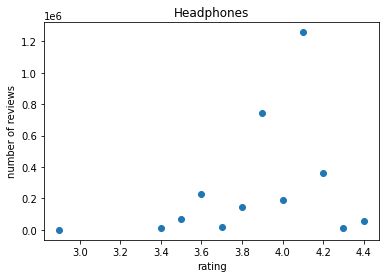

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(new_df.index,new_df['reviews'])
plt.xlabel('rating')
plt.ylabel('number of reviews')
plt.title('Headphones')
plt.show()


**The below code will recomend the best headphone considering maximum reviews,rating and discount** - **max(reviews x rating x discount)**






In [ ]:
df4['rating'] = df4['rating'].astype(float)
df4['col'] = df4['reviews']*df4['rating']*df4['discount']

df4[df4['col'] == (df4['reviews']*df4['rating']*df4['discount']).max()]

Product name  ...          col
38  boAt Bassheads 100 in Ear Wired Earphones with...  ...  8.49074e+07

[1 rows x 7 columns]

**It turns out that the same earphone is on amazon's choice**

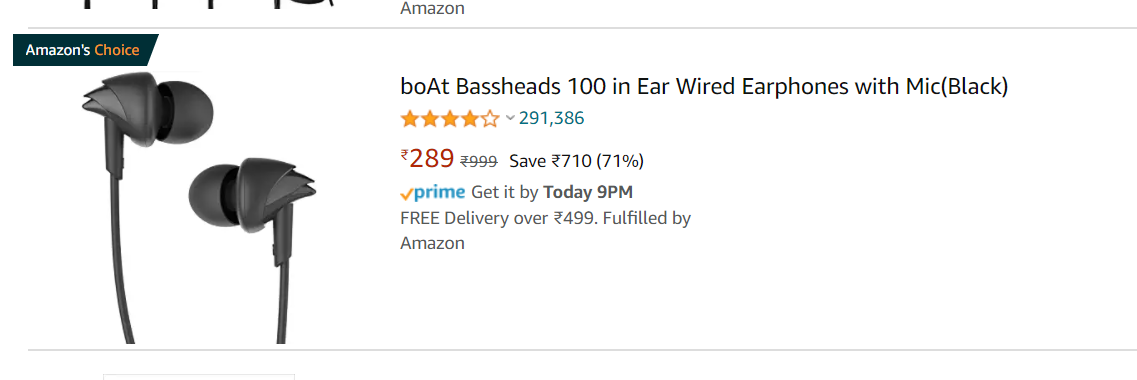

In [ ]:
df4.drop(['col'], axis = 1, inplace = True)


In [ ]:
df4.to_csv('Headphone prices')
df4.shape
df4.head()

Product name   mrp  ...  offer price  discount
1  Boult Audio Bass Buds Q2 Over-Ear Wired Lightw...  2490  ...          599   75.9438
2  boAt Rockerz 450 Bluetooth Wireless On Ear Hea...  3990  ...          999   74.9624
3  boAt Bassheads 900 Wired On Ear Headphones wit...  2490  ...          579    76.747
4  boAt Rockerz 550 Bluetooth Wireless Over Ear H...  4999  ...         1899   62.0124
5  boAt Rockerz 400 Wireless Bluetooth On Ear Hea...  2990  ...         1399   53.2107

[5 rows x 6 columns]